In [39]:
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')
from sklearn.preprocessing import StandardScaler

### 630209

In [2]:
with open('timeseries.xml', 'r') as f:
    data = f.read() 

In [3]:
bs_data = bs(data, 'xml') 

In [4]:
b_name = bs_data.find_all('name') 
a = b_name[0].find_all('component')[0].get('data')
b = b_name[0].find_all('component')[1].get('data')
c = b_name[0].find_all('component')[2].get('data')
print(b_name[0].find_all('component')[0].get('data'))

42.682301,42.675301,42.648754,42.606075,42.550922,42.487499,42.420120,42.352810,42.289207,42.232094,42.183540,42.144814,42.116177,42.097065,42.086040,42.080990,42.079361,42.078392,42.075207,42.067261,42.052341,42.028824,41.995850,41.953224,41.901508,41.841969,41.776367,41.706982,41.636395,41.567295,41.502483,41.444576,41.396076,41.359261,41.336040,41.327835,41.335667,41.359924,41.400261,41.455696,41.524364,41.603584,41.689873,41.779064,41.866665,41.948055,42.018974,42.075886,42.116070,42.138187,42.142151,42.129208,42.101673,42.062820,42.016281,41.965977,41.915676,41.868896,41.828609,41.797256,41.776630,41.767887,41.771744,41.788296,41.817234,41.857750,41.908611,41.968029,42.033833,42.103325,42.173458,42.240929,42.302536,42.355267,42.396801,42.425686,42.441666,42.445816,42.440479,42.429043,42.415577,42.404682,42.400890,42.408421,42.430763,42.470467,42.528927,42.606312,42.701553,42.812527,42.936035,43.068245,43.204689,43.340618,43.471214,43.591747,43.697834,43.785744,43.852592,43.896568,

In [5]:
np.asarray(b_name[1].find_all('component')[0].get('data'))

array('-11.731248,-11.736996,-11.743402,-11.750606,-11.758590,-11.767201,-11.776124,-11.784850,-11.792709,-11.798953,-11.802839,-11.803707,-11.801042,-11.794486,-11.783813,-11.768858,-11.749456,-11.725407,-11.696428,-11.662130,-11.621982,-11.575284,-11.521182,-11.458749,-11.387186,-11.306087,-11.215735,-11.117495,-11.014101,-10.909476,-10.807761,-10.712089,-10.624070,-10.543959,-10.471221,-10.405226,-10.345631,-10.292431,-10.245838,-10.206161,-10.173654,-10.148439,-10.130458,-10.119461,-10.115008,-10.116502,-10.123206,-10.134297,-10.148882,-10.166058,-10.184956,-10.204922,-10.225637,-10.246997,-10.268926,-10.291347,-10.314172,-10.337328,-10.360765,-10.384430,-10.408306,-10.432407,-10.456815,-10.481722,-10.507463,-10.534551,-10.563643,-10.595551,-10.631131,-10.671247,-10.716645,-10.767867,-10.825151,-10.888385,-10.957026,-11.030044,-11.105865,-11.182369,-11.257124,-11.327650,-11.391720,-11.447741,-11.495067,-11.533936,-11.565240,-11.590278,-11.610409,-11.626782,-11.640307,-11.651742,-11

In [34]:
b_name[0].get('value')

'Head Angles'

In [6]:
Attributes = []

for i in range(len(b_name)):
    Attributes.append(b_name[i].get('value'))
    
Attributes = list(set(Attributes))

In [9]:
Attributes

['Trunk Angles_wrt_LAB',
 'R_FCC_VLab',
 'Right Pelvic Angles',
 'Left_Knee_Ankle_distance',
 'Left_Knee_VLab',
 'Right Hip Angles',
 'Head Angles',
 'Left Foot Progression',
 'Right Shoulder_Pelvis Angle',
 'Left Wrist Angles',
 'L_FCC_VLab',
 'Left Pelvic Angles',
 'Right_Knee_Ankle_distance',
 'Right Shoulder Angles',
 'Right Wrist Angles',
 'Right Knee Angles',
 'Trunk Angles',
 'Right Ankle Angles',
 'Right Foot Contact Angle',
 'Left Shoulder_Pelvis Angle',
 'PelvisPos',
 'Left Ankle Angles',
 'Left Trunk Angles_wrt_LAB',
 'Left Hip Angles',
 'Right Foot Progression',
 'Left Foot Contact Angle',
 'Right_Knee_VLab',
 'L_FM2_VLab',
 'R_FM2_VLab',
 'Left Trunk Angles',
 'Left Shoulder Angles',
 'Left Knee Angles']

In [50]:
Attribute_values_630209 = []
for i in range(int(len(b_name)/4)):
    b_name = bs_data.find_all('name') 
    a1 = b_name[i].find_all('component')[0].get('data')
    b1 = b_name[i].find_all('component')[1].get('data')
    c1 = b_name[i].find_all('component')[2].get('data')
    a1 = np.asarray([float(x) for x in a1.split(',')])
    b1 = np.asarray([float(x) for x in b1.split(',')])
    c1 = np.asarray([float(x) for x in c1.split(',')])
    r = (a1**2 + b1**2 + c1**2)**0.5
    print(a1)
    Attribute_values_630209.append(r)

Final_attribute_values_630209 = []
for i in range(int(len(Attribute_values_630209))):
    Final_attribute_values_630209.append((Attribute_values_630209[i]))


Collection = {}
for i in range(len(Attributes)):
    Collection[Attributes[i]] = Final_attribute_values_630209[i]
df630209_p1 = pd.DataFrame(Collection)


[42.682301 42.675301 42.648754 42.606075 42.550922 42.487499 42.42012
 42.35281  42.289207 42.232094 42.18354  42.144814 42.116177 42.097065
 42.08604  42.08099  42.079361 42.078392 42.075207 42.067261 42.052341
 42.028824 41.99585  41.953224 41.901508 41.841969 41.776367 41.706982
 41.636395 41.567295 41.502483 41.444576 41.396076 41.359261 41.33604
 41.327835 41.335667 41.359924 41.400261 41.455696 41.524364 41.603584
 41.689873 41.779064 41.866665 41.948055 42.018974 42.075886 42.11607
 42.138187 42.142151 42.129208 42.101673 42.06282  42.016281 41.965977
 41.915676 41.868896 41.828609 41.797256 41.77663  41.767887 41.771744
 41.788296 41.817234 41.85775  41.908611 41.968029 42.033833 42.103325
 42.173458 42.240929 42.302536 42.355267 42.396801 42.425686 42.441666
 42.445816 42.440479 42.429043 42.415577 42.404682 42.40089  42.408421
 42.430763 42.470467 42.528927 42.606312 42.701553 42.812527 42.936035
 43.068245 43.204689 43.340618 43.471214 43.591747 43.697834 43.785744
 43.85259

In [51]:
df630209_p1

,Trunk Angles_wrt_LAB,R_FCC_VLab,Right Pelvic Angles,Left_Knee_Ankle_distance,Left_Knee_VLab,Right Hip Angles,Head Angles,Left Foot Progression,Right Shoulder_Pelvis Angle,Left Wrist Angles,...,Left Trunk Angles_wrt_LAB,Left Hip Angles,Right Foot Progression,Left Foot Contact Angle,Right_Knee_VLab,L_FM2_VLab,R_FM2_VLab,Left Trunk Angles,Left Shoulder Angles,Left Knee Angles
0,42.803667,63.475595,53.161080,13.363540,29.662444,29.662444,109.785887,114.111163,38.617280,78.127420,...,109.723014,116.899972,38.881374,86.587116,6.945116,43.381950,39.039304,22.593759,8.359657,46.053183
1,42.797222,63.138229,52.594478,13.536116,28.255628,28.255628,110.045565,113.206098,38.535336,78.131906,...,110.315697,116.279836,38.869432,86.492033,6.926532,43.325447,39.039355,22.430361,8.456032,46.126826
2,42.771321,62.851902,52.101468,13.686746,26.853216,26.853216,110.187234,112.140894,38.456380,78.140084,...,110.767313,115.495863,38.850668,86.386858,6.871597,43.265298,39.039253,22.294563,8.561295,46.207833
3,42.729381,62.619952,51.684435,13.822017,25.459280,25.459280,110.214418,110.927400,38.382644,78.153897,...,111.074060,114.555875,38.825291,86.277834,6.783882,43.201666,39.039223,22.181154,8.673606,46.293646
4,42.675067,62.446162,51.346325,13.947424,24.077933,24.077933,110.129749,109.576706,38.315509,78.175043,...,111.232493,113.466214,38.793204,86.170681,6.667516,43.134636,39.039203,22.085839,8.791061,46.381606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,43.806887,65.259462,56.045942,12.455838,35.110693,35.110693,107.736286,116.080144,38.996506,78.161190,...,106.150203,117.669513,38.952371,86.680770,6.745693,43.629047,39.039327,23.665070,8.013306,45.856801
97,43.894819,64.767081,55.236037,12.776979,33.731958,33.731958,108.434126,115.851199,38.930207,78.165729,...,107.198766,117.727706,38.967158,86.674678,6.876683,43.589102,39.039290,23.350304,8.065133,45.886724
98,43.961986,64.310170,54.482833,13.055990,32.343488,32.343488,109.027521,115.457697,38.855470,78.168390,...,108.151872,117.616865,38.975171,86.643016,6.974483,43.544233,39.039249,23.075841,8.129263,45.928113
99,44.006504,63.892244,53.791083,13.295881,30.952151,30.952151,109.511717,114.900789,38.775249,78.169395,...,108.997384,117.336814,38.976518,86.587292,7.035732,43.494736,39.039284,22.840146,8.204800,45.980685


Text(0, 0.5, 'Lefts')

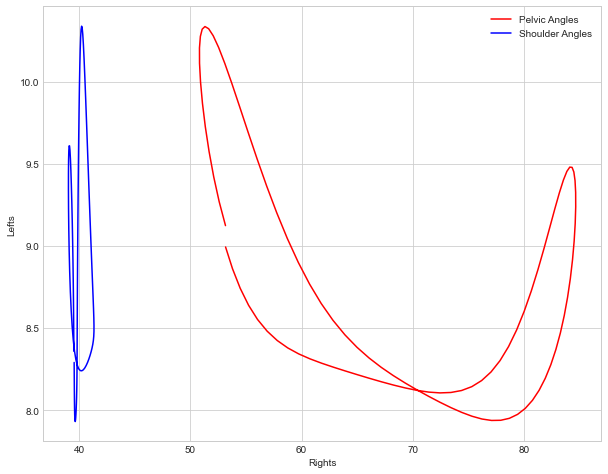

In [40]:
plt.figure(figsize = (10,8))
plt.plot(df1_p1['Right Pelvic Angles'], df1_p1['Left Pelvic Angles'], 'r', label = 'Pelvic Angles')
plt.plot(df1_p1['Right Shoulder Angles'], df1_p1['Left Shoulder Angles'], 'b', label = 'Shoulder Angles')
#plt.plot(df1_p1['Right Hip Angles'], df1_p1['Left Hip Angles'], 'g', label = 'Hip Angles')
plt.legend()
plt.xlabel('Rights')
plt.ylabel('Lefts')

In [22]:
Attribute_values2 = []
for i in range(int(len(b_name)/4), int(len(b_name)/4) + 32):
    b_name = bs_data.find_all('name') 
    a1 = b_name[i].find_all('component')[0].get('data')
    b1 = b_name[i].find_all('component')[1].get('data')
    c1 = b_name[i].find_all('component')[2].get('data')
    a1 = np.asarray([float(x) for x in a1.split(',')])
    b1 = np.asarray([float(x) for x in b1.split(',')])
    c1 = np.asarray([float(x) for x in c1.split(',')])
    r = (a1**2 + b1**2 + c1**2)**0.5
    print(a1)
    Attribute_values2.append(r)
    
Final_attribute_values2 = []
for i in range(int(len(Attribute_values2))):
    Final_attribute_values2.append((Attribute_values2[i]))

Collection2 = {}
for i in range(len(Attributes)):
    Collection2[Attributes[i]] = Final_attribute_values2[i]
df1_p2 = pd.DataFrame(Collection2)

[41.09206  41.087994 41.063251 41.021336 40.965824 40.900608 40.829662
 40.756969 40.686127 40.620277 40.561951 40.513096 40.474987 40.448402
 40.433563 40.430168 40.437374 40.453758 40.47723  40.505272 40.535004
 40.563332 40.587322 40.604313 40.612225 40.609661 40.596062 40.571697
 40.537724 40.495888 40.448738 40.399326 40.351116 40.307774 40.272961
 40.250099 40.242096 40.251091 40.278198 40.323395 40.385403 40.461739
 40.548931 40.642681 40.738281 40.831017 40.916481 40.990875 41.051456
 41.096519 41.125664 41.139801 41.140968 41.132092 41.116726 41.098652
 41.081429 41.06818  41.061256 41.062153 41.071537 41.0891   41.11396
 41.144661 41.179401 41.216236 41.253105 41.288021 41.319233 41.345165
 41.364491 41.376293 41.380154 41.376045 41.364605 41.347008 41.324898
 41.300533 41.27655  41.256016 41.242188 41.238247 41.247284 41.272003
 41.314556 41.376301 41.457661 41.557949 41.675411 41.80711  41.949192
 42.097027 42.245583 42.38969  42.5243   42.644798 42.747261 42.82877
 42.8875

In [23]:
df1_p2

,Trunk Angles_wrt_LAB,R_FCC_VLab,Right Pelvic Angles,Left_Knee_Ankle_distance,Left_Knee_VLab,Right Hip Angles,Head Angles,Left Foot Progression,Right Shoulder_Pelvis Angle,Left Wrist Angles,...,Left Trunk Angles_wrt_LAB,Left Hip Angles,Right Foot Progression,Left Foot Contact Angle,Right_Knee_VLab,L_FM2_VLab,R_FM2_VLab,Left Trunk Angles,Left Shoulder Angles,Left Knee Angles
0,41.447312,63.236378,53.175565,12.211690,30.529874,30.529874,109.295676,114.038872,37.973295,77.853906,...,109.088357,117.019481,38.197895,84.589275,5.264493,40.530154,39.037123,22.717443,9.237113,46.141154
1,41.446620,62.869198,52.605628,12.263917,29.210025,29.210025,109.607839,113.144268,37.895001,77.736618,...,109.732935,116.421995,38.221756,84.486267,5.337044,40.511946,39.037371,22.549367,9.303468,46.205506
2,41.424789,62.551383,52.109982,12.294982,27.899885,27.899885,109.799927,112.092652,37.817091,77.623793,...,110.229067,115.650212,38.240346,84.374653,5.390237,40.492508,39.037475,22.408955,9.379518,46.281766
3,41.385442,62.286972,51.691134,12.315278,26.601493,26.601493,109.874199,110.896241,37.741659,77.520584,...,110.571477,114.711722,38.253037,84.260931,5.425158,40.471813,39.037656,22.291286,9.464375,46.367355
4,41.332262,62.080429,51.352002,12.333557,25.316915,25.316915,109.832367,109.566307,37.670081,77.431654,...,110.755434,113.612624,38.258910,84.151630,5.444022,40.449737,39.037853,22.192311,9.556990,46.459410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,43.094732,65.061831,56.105461,11.533507,35.968193,35.968193,107.029804,116.014525,38.252941,78.231192,...,105.388052,117.713756,38.036512,85.017714,5.001090,40.567220,39.035631,23.651775,9.214325,46.161984
97,43.181005,64.551905,55.285183,11.779597,34.622268,34.622268,107.777820,115.784572,38.201507,78.147930,...,106.501720,117.814921,38.081283,84.979688,5.091336,40.552546,39.035717,23.337764,9.231171,46.168488
98,43.243814,64.072649,54.520196,11.971650,33.272563,33.272563,108.424435,115.386956,38.139269,78.056695,...,107.520676,117.743056,38.123192,84.919393,5.182496,40.535306,39.035830,23.063661,9.257757,46.189120
99,43.282626,63.628039,53.815395,12.115399,31.923911,31.923911,108.962760,114.821660,38.068717,77.959139,...,108.430030,117.496015,38.161862,84.838040,5.269378,40.515966,39.036039,22.828083,9.294314,46.224223


In [26]:
Attribute_values3 = []
for i in range(int(len(b_name)/4)+32, int(len(b_name)/4) + 64):
    b_name = bs_data.find_all('name') 
    a1 = b_name[i].find_all('component')[0].get('data')
    b1 = b_name[i].find_all('component')[1].get('data')
    c1 = b_name[i].find_all('component')[2].get('data')
    a1 = np.asarray([float(x) for x in a1.split(',')])
    b1 = np.asarray([float(x) for x in b1.split(',')])
    c1 = np.asarray([float(x) for x in c1.split(',')])
    r = (a1**2 + b1**2 + c1**2)**0.5
    print(a1)
    Attribute_values3.append(r)
    
Final_attribute_values3 = []
for i in range(int(len(Attribute_values3))):
    Final_attribute_values3.append((Attribute_values3[i]))

Collection3 = {}
for i in range(len(Attributes)):
    Collection3[Attributes[i]] = Final_attribute_values3[i]
df1_p3 = pd.DataFrame(Collection3)

[43.245754 43.344662 43.419376 43.469616 43.496132 43.501122 43.488148
 43.461678 43.427036 43.389709 43.355053 43.327858 43.312004 43.310444
 43.32494  43.356106 43.403332 43.46484  43.537636 43.617672 43.699867
 43.778454 43.847134 43.899555 43.929642 43.931965 43.902225 43.837551
 43.736824 43.600979 43.432907 43.237473 43.021187 42.791798 42.557762
 42.327801 42.110317 41.913078 41.742592 41.603935 41.500393 41.433464
 41.402729 41.405857 41.438744 41.495705 41.569763 41.653259 41.738289
 41.817326 41.883801 41.932537 41.960197 41.965412 41.949036 41.913891
 41.864388 41.80592  41.744289 41.685341 41.634415 41.596157 41.5741
 41.570621 41.586838 41.622646 41.676884 41.747215 41.830566 41.923073
 42.020382 42.117832 42.210575 42.294083 42.364437 42.418831 42.455757
 42.475395 42.479649 42.472073 42.457413 42.441101 42.428822 42.425831
 42.436794 42.465298 42.513729 42.583305 42.674057 42.784958 42.914257
 43.059299 43.216957 43.383675 43.555557 43.72847  43.898148 44.060249
 44.2106

In [27]:
df1_p3

,Trunk Angles_wrt_LAB,R_FCC_VLab,Right Pelvic Angles,Left_Knee_Ankle_distance,Left_Knee_VLab,Right Hip Angles,Head Angles,Left Foot Progression,Right Shoulder_Pelvis Angle,Left Wrist Angles,...,Left Trunk Angles_wrt_LAB,Left Hip Angles,Right Foot Progression,Left Foot Contact Angle,Right_Knee_VLab,L_FM2_VLab,R_FM2_VLab,Left Trunk Angles,Left Shoulder Angles,Left Knee Angles
0,43.390217,63.325580,53.194460,12.611491,30.451716,30.451716,107.853252,113.987918,37.549185,72.107446,...,107.447823,116.671225,37.557660,81.402102,8.563727,37.817214,39.038794,22.775167,10.550808,46.429250
1,43.499562,62.891520,52.625050,12.443015,29.324770,29.324770,108.280519,113.137565,37.502436,71.713182,...,108.096074,116.058841,37.572321,81.244115,8.710087,37.774303,39.038930,22.582316,10.673133,46.517833
2,43.583605,62.518750,52.130164,12.294188,28.173326,28.173326,108.585855,112.129603,37.462316,71.314819,...,108.596244,115.271921,37.583815,81.069933,8.806859,37.732514,39.038880,22.416956,10.795609,46.621720
3,43.642087,62.211597,51.712284,12.177033,26.997912,26.997912,108.769470,110.975756,37.429454,70.930732,...,108.945007,114.318782,37.592143,80.890643,8.852949,37.692942,39.038904,22.274207,10.915591,46.737793
4,43.675784,61.974753,51.374356,12.100768,25.799475,25.799475,108.830665,109.686283,37.403362,70.577083,...,109.140078,113.206381,37.596952,80.717229,8.848881,37.656391,39.038928,22.150335,11.030994,46.862549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,43.984485,65.516663,56.129056,13.055043,34.862377,34.862377,104.979959,115.740995,37.667399,73.406848,...,103.641387,117.313367,37.529508,81.669311,7.701479,38.115364,39.038553,23.885652,10.111684,46.258846
97,44.159559,64.902443,55.308725,12.970834,33.808121,33.808121,105.838098,115.557257,37.622484,73.218419,...,104.765680,117.407334,37.556262,81.634432,7.984190,38.080177,39.038592,23.547920,10.205245,46.277374
98,44.322568,64.325800,54.543283,12.849443,32.732253,32.732253,106.598459,115.204661,37.571957,72.966863,...,105.790704,117.324231,37.579817,81.562589,8.243869,38.041813,39.038630,23.250084,10.310268,46.313875
99,44.469575,63.792380,53.837820,12.704285,31.634455,31.634455,107.252706,114.683009,37.519112,72.661682,...,106.701432,117.062432,37.600046,81.455356,8.472024,38.001220,39.038743,22.990873,10.424211,46.368913


In [28]:
Attribute_values4 = []
for i in range(int(len(b_name)/4)+32, int(len(b_name)/4) + 64):
    b_name = bs_data.find_all('name') 
    a1 = b_name[i].find_all('component')[0].get('data')
    b1 = b_name[i].find_all('component')[1].get('data')
    c1 = b_name[i].find_all('component')[2].get('data')
    a1 = np.asarray([float(x) for x in a1.split(',')])
    b1 = np.asarray([float(x) for x in b1.split(',')])
    c1 = np.asarray([float(x) for x in c1.split(',')])
    r = (a1**2 + b1**2 + c1**2)**0.5
    print(a1)
    Attribute_values4.append(r)
    
Final_attribute_values4 = []
for i in range(int(len(Attribute_values4))):
    Final_attribute_values4.append((Attribute_values4[i]))

Collection4 = {}
for i in range(len(Attributes)):
    Collection4[Attributes[i]] = Final_attribute_values4[i]
df1_p4 = pd.DataFrame(Collection4)

[43.245754 43.344662 43.419376 43.469616 43.496132 43.501122 43.488148
 43.461678 43.427036 43.389709 43.355053 43.327858 43.312004 43.310444
 43.32494  43.356106 43.403332 43.46484  43.537636 43.617672 43.699867
 43.778454 43.847134 43.899555 43.929642 43.931965 43.902225 43.837551
 43.736824 43.600979 43.432907 43.237473 43.021187 42.791798 42.557762
 42.327801 42.110317 41.913078 41.742592 41.603935 41.500393 41.433464
 41.402729 41.405857 41.438744 41.495705 41.569763 41.653259 41.738289
 41.817326 41.883801 41.932537 41.960197 41.965412 41.949036 41.913891
 41.864388 41.80592  41.744289 41.685341 41.634415 41.596157 41.5741
 41.570621 41.586838 41.622646 41.676884 41.747215 41.830566 41.923073
 42.020382 42.117832 42.210575 42.294083 42.364437 42.418831 42.455757
 42.475395 42.479649 42.472073 42.457413 42.441101 42.428822 42.425831
 42.436794 42.465298 42.513729 42.583305 42.674057 42.784958 42.914257
 43.059299 43.216957 43.383675 43.555557 43.72847  43.898148 44.060249
 44.2106

In [29]:
df1_p4

,Trunk Angles_wrt_LAB,R_FCC_VLab,Right Pelvic Angles,Left_Knee_Ankle_distance,Left_Knee_VLab,Right Hip Angles,Head Angles,Left Foot Progression,Right Shoulder_Pelvis Angle,Left Wrist Angles,...,Left Trunk Angles_wrt_LAB,Left Hip Angles,Right Foot Progression,Left Foot Contact Angle,Right_Knee_VLab,L_FM2_VLab,R_FM2_VLab,Left Trunk Angles,Left Shoulder Angles,Left Knee Angles
0,43.390217,63.325580,53.194460,12.611491,30.451716,30.451716,107.853252,113.987918,37.549185,72.107446,...,107.447823,116.671225,37.557660,81.402102,8.563727,37.817214,39.038794,22.775167,10.550808,46.429250
1,43.499562,62.891520,52.625050,12.443015,29.324770,29.324770,108.280519,113.137565,37.502436,71.713182,...,108.096074,116.058841,37.572321,81.244115,8.710087,37.774303,39.038930,22.582316,10.673133,46.517833
2,43.583605,62.518750,52.130164,12.294188,28.173326,28.173326,108.585855,112.129603,37.462316,71.314819,...,108.596244,115.271921,37.583815,81.069933,8.806859,37.732514,39.038880,22.416956,10.795609,46.621720
3,43.642087,62.211597,51.712284,12.177033,26.997912,26.997912,108.769470,110.975756,37.429454,70.930732,...,108.945007,114.318782,37.592143,80.890643,8.852949,37.692942,39.038904,22.274207,10.915591,46.737793
4,43.675784,61.974753,51.374356,12.100768,25.799475,25.799475,108.830665,109.686283,37.403362,70.577083,...,109.140078,113.206381,37.596952,80.717229,8.848881,37.656391,39.038928,22.150335,11.030994,46.862549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,43.984485,65.516663,56.129056,13.055043,34.862377,34.862377,104.979959,115.740995,37.667399,73.406848,...,103.641387,117.313367,37.529508,81.669311,7.701479,38.115364,39.038553,23.885652,10.111684,46.258846
97,44.159559,64.902443,55.308725,12.970834,33.808121,33.808121,105.838098,115.557257,37.622484,73.218419,...,104.765680,117.407334,37.556262,81.634432,7.984190,38.080177,39.038592,23.547920,10.205245,46.277374
98,44.322568,64.325800,54.543283,12.849443,32.732253,32.732253,106.598459,115.204661,37.571957,72.966863,...,105.790704,117.324231,37.579817,81.562589,8.243869,38.041813,39.038630,23.250084,10.310268,46.313875
99,44.469575,63.792380,53.837820,12.704285,31.634455,31.634455,107.252706,114.683009,37.519112,72.661682,...,106.701432,117.062432,37.600046,81.455356,8.472024,38.001220,39.038743,22.990873,10.424211,46.368913


### 930320

In [41]:
with open('timeseries2.xml', 'r') as f:
    data2 = f.read() 

In [42]:
bs_data2 = bs(data2, 'xml') 

In [43]:
b_name2 = bs_data2.find_all('name')

In [53]:
Attribute_values_930320 = []
for i in range(int(len(b_name2)/4)):
    b_name2 = bs_data2.find_all('name') 
    a1 = b_name2[i].find_all('component')[0].get('data')
    b1 = b_name2[i].find_all('component')[1].get('data')
    c1 = b_name2[i].find_all('component')[2].get('data')
    a1 = np.asarray([float(x) for x in a1.split(',')])
    b1 = np.asarray([float(x) for x in b1.split(',')])
    c1 = np.asarray([float(x) for x in c1.split(',')])
    r = (a1**2 + b1**2 + c1**2)**0.5
    print(a1)
    Attribute_values_930320.append(r)

Final_attribute_values_930320 = []
for i in range(int(len(Attribute_values_930320))):
    Final_attribute_values_930320.append((Attribute_values_930320[i]))


Collection = {}
for i in range(len(Attributes)):
    Collection[Attributes[i]] = Final_attribute_values_930320[i]
df930320_p1 = pd.DataFrame(Collection)

[46.1413   46.076443 46.008461 45.939507 45.871689 45.807049 45.747173
 45.693264 45.645935 45.60519  45.570614 45.541466 45.516941 45.49646
 45.479591 45.466103 45.45575  45.448448 45.444004 45.442238 45.44289
 45.445686 45.450397 45.456882 45.46529  45.475979 45.489586 45.506901
 45.528889 45.55648  45.590599 45.631916 45.680809 45.73735  45.801212
 45.871681 45.947731 46.027988 46.110649 46.193623 46.274612 46.351322
 46.421585 46.483463 46.535286 46.575752 46.603928 46.619236 46.621536
 46.61124  46.589432 46.557903 46.519062 46.475685 46.430607 46.386494
 46.345505 46.309097 46.278049 46.252316 46.231369 46.214169 46.199444
 46.185844 46.172077 46.156963 46.139412 46.118473 46.09338  46.063725
 46.029484 45.991074 45.949314 45.905361 45.860695 45.817085 45.776367
 45.74041  45.711056 45.690105 45.679096 45.67918  45.690891 45.714046
 45.747684 45.790161 45.839153 45.891945 45.945625 45.99741  46.044651
 46.085121 46.117046 46.139061 46.150429 46.150795 46.140282 46.119263
 46.0885

In [59]:
df630209_p1

,Trunk Angles_wrt_LAB,R_FCC_VLab,Right Pelvic Angles,Left_Knee_Ankle_distance,Left_Knee_VLab,Right Hip Angles,Head Angles,Left Foot Progression,Right Shoulder_Pelvis Angle,Left Wrist Angles,...,Left Trunk Angles_wrt_LAB,Left Hip Angles,Right Foot Progression,Left Foot Contact Angle,Right_Knee_VLab,L_FM2_VLab,R_FM2_VLab,Left Trunk Angles,Left Shoulder Angles,Left Knee Angles
0,42.803667,63.475595,53.161080,13.363540,29.662444,29.662444,109.785887,114.111163,38.617280,78.127420,...,109.723014,116.899972,38.881374,86.587116,6.945116,43.381950,39.039304,22.593759,8.359657,46.053183
1,42.797222,63.138229,52.594478,13.536116,28.255628,28.255628,110.045565,113.206098,38.535336,78.131906,...,110.315697,116.279836,38.869432,86.492033,6.926532,43.325447,39.039355,22.430361,8.456032,46.126826
2,42.771321,62.851902,52.101468,13.686746,26.853216,26.853216,110.187234,112.140894,38.456380,78.140084,...,110.767313,115.495863,38.850668,86.386858,6.871597,43.265298,39.039253,22.294563,8.561295,46.207833
3,42.729381,62.619952,51.684435,13.822017,25.459280,25.459280,110.214418,110.927400,38.382644,78.153897,...,111.074060,114.555875,38.825291,86.277834,6.783882,43.201666,39.039223,22.181154,8.673606,46.293646
4,42.675067,62.446162,51.346325,13.947424,24.077933,24.077933,110.129749,109.576706,38.315509,78.175043,...,111.232493,113.466214,38.793204,86.170681,6.667516,43.134636,39.039203,22.085839,8.791061,46.381606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,43.806887,65.259462,56.045942,12.455838,35.110693,35.110693,107.736286,116.080144,38.996506,78.161190,...,106.150203,117.669513,38.952371,86.680770,6.745693,43.629047,39.039327,23.665070,8.013306,45.856801
97,43.894819,64.767081,55.236037,12.776979,33.731958,33.731958,108.434126,115.851199,38.930207,78.165729,...,107.198766,117.727706,38.967158,86.674678,6.876683,43.589102,39.039290,23.350304,8.065133,45.886724
98,43.961986,64.310170,54.482833,13.055990,32.343488,32.343488,109.027521,115.457697,38.855470,78.168390,...,108.151872,117.616865,38.975171,86.643016,6.974483,43.544233,39.039249,23.075841,8.129263,45.928113
99,44.006504,63.892244,53.791083,13.295881,30.952151,30.952151,109.511717,114.900789,38.775249,78.169395,...,108.997384,117.336814,38.976518,86.587292,7.035732,43.494736,39.039284,22.840146,8.204800,45.980685


Text(0, 0.5, 'Lefts')

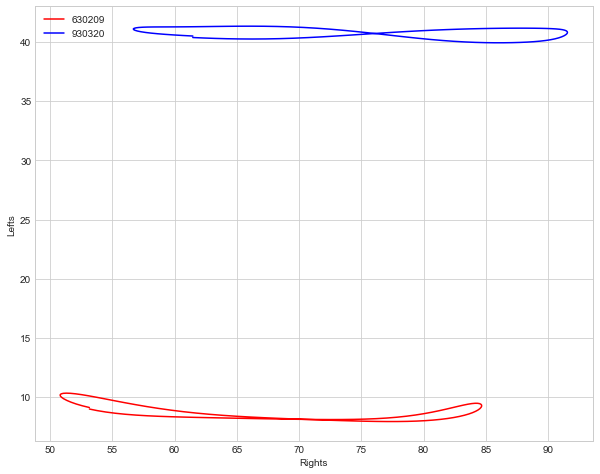

In [58]:
plt.figure(figsize = (10,8))
plt.plot(df630209_p1['Right Pelvic Angles'], df630209_p1['Left Pelvic Angles'], 'r', label = '630209')
plt.plot(df930320_p1['Right Pelvic Angles'], df930320_p1['Left Pelvic Angles'], 'b', label = '930320')
plt.legend()
plt.xlabel('Rights')
plt.ylabel('Lefts')